# The Curse of Dimensionality

## Example 1: $P(x)$ of $x$ being at the border of a unit square

Pick a random point in a unit square (1 x 1). It will have 0.4% chance of being located less than 0.001 from the border.

Let's make a simulation of this scenario:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [103]:
def vis_square(border):
    """
    Visualize a square with a border and a random point
    """
    
    def draw_squares(border):
        # draws the two squares
        sqr = mpl.patches.Rectangle((0,0),1,1)
        ax.add_patch(sqr)
        sqr_2 = mpl.patches.Rectangle((0+border,0+border),1-border*2,1-border*2, color='w')
        ax.add_patch(sqr_2)

    # random point (x, y):
    x, y = np.random.rand(2)

    fig, ax = plt.subplots(figsize=(7,7))
    draw_squares(border)
    ax.plot([x],[y], c='r',marker='x', markersize=12)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    plt.show()

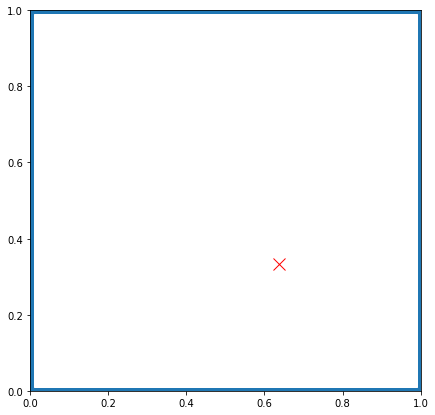

In [104]:
vis_square(0.01)  # border = 0.001 is not visible 

The probability of the random point $x$ to land in the blue zone is:

### with Monte Carlo simulation (naive approach):

In [105]:
def simulate(n=10000, mat=mat):
    count = 0
    border_points = 0

    while count < n:    
        sample = np.random.choice(mat.flat)
        if sample == 0:
            border_points +=1
        count += 1

    print(f'probabilty of point in border: {border_points/count}')

In [106]:
mat = np.zeros((1000,1000), dtype=np.bool)
mat[1:-1,1:-1] = 1  # left border with 0 

In [107]:
simulate(10000, mat)

probabilty of point in border: 0.0043


the problem of this approach is that with 4 dimension ($1000^4$) we run out of memory.

Each element of `np.bool` is a byte. So we need 1000^4 bytes which is **931.32257 Gb** ...a bit too much.


### With math:

Let's start with 1-D example:

We have a segment of length 1. And we crop two small segments of 0.001 at both ends of the the segment. We will call $B$ the small segments ($B = 0.002$) and the long segment $A$:

$$ A_1 + B_1 = 1 $$

then, 

$$ A_1 = 1 - B_1 $$

$$ A_1 = 0.998 $$

The probability of picking a random point that lays in the borders is:

$$P(x \in B) = 1 - 0.998 = 0.002 $$
$$P(x \in B) = B$$

Which is the length of the borders.

For the 2-D example simply square the inner segment $A^2 = 0.996$ and do difference with $1$ to get the area of the border:

$$ B_2 = 1 - 0.998^2 = 0.004 $$

Generalizing for arbitrary number of dimensions $d$:

$$ B_d = 1 - 0.998^d $$

In [43]:
# implement the equaiton
def border_prob(d):
    prob = 1 - (0.998)**d
    return prob

In [47]:
border_prob(10000)

0.999999997979714

4e-06

## Distance example

mean distance between two random points

In [49]:
def mean_dist(d, n):
    distances = []
    for _ in range(n):
        a = np.random.rand(d)
        b = np.random.rand(d)
        distances.append(np.linalg.norm(a-b))
    return np.mean(distances)

In [66]:
mean_dist(30000,1000)

70.71263898980921

In [64]:
from scipy.spatial import distance

def mean_dist_improved(d, n):
    """
    imporved version, more 'numpystic'
    """
    mat = np.random.rand(n, d)
    return distance.pdist(mat).mean()

In [67]:
mean_dist_improved(30000,1000)

70.70273504945953